# Data Exploration with Python

In the following, we will get some first experience with using Python and Jupyter notebooks for explorartive data analysis. We will again use the data from the NSW "Work-From-Home" survey as our example scenario.

## EXERCISE 1: Reading and accessing data

### Reading the WFH survey responses data using Pandas

Download the _WFH-Survey-Responses-NSW.csv_ file. This is a clean version of the file. Note that we have changed the format of the file to .csv (comma-separated values), so you can get familiar with another very common file type. **Make sure that you save this file in the same folder you have this Jupyter notebook.**

To read the file and store the data, we will use `pandas`, an external Python module which contains useful functionality for processing and transforming data. First we will read our file with the `read_csv` function, and then we will print the first 3 rows of our data using the `head` function, to see how it looks like.

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('WFH-Survey-Responses-NSW.csv')
df.head(3)

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,My organisation encouraged people to work remotely,My organisation was well prepared for me to work remotely,It was common for people in my organisation to work remotely,It was easy to get permission to work remotely,I could easily collaborate with colleagues when working remotely,I would recommend remote working to others,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN,NaN
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,NaN,NaN,NaN,NaN


As you can see, there are four columns at the end of the file that contain no information. We can easily remove them by using the pandas `drop` function. You can use this function to remove columns or rows, or even single cells.

In [5]:
df.drop(columns=['Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22']).head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,How long have you been in your current job?,Metro / Regional,"Thinking about your current job, how much of your time did you spend remote working last year?",My organisation encouraged people to work remotely,My organisation was well prepared for me to work remotely,It was common for people in my organisation to work remotely,It was easy to get permission to work remotely,I could easily collaborate with colleagues when working remotely,I would recommend remote working to others
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,0%,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,60%,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree
3,4,1987,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,20%,Strongly disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree
4,5,1991,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,10%,Strongly disagree,Somewhat agree,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree


### Let's define column header names (define constants for dictionary keys)

In pandas, we can access the information of a column using the _header_ as an input, as `df['column_header']`. You can even select multiple columns, separating each column header by a comma, e.g: `df[['column1_header','column2_header']]`.

Given that the headers in our file are very long questions, we can create a variable with a shorter name to store the original header. That way we can use this shorter version as an input instead of the original header, making it much easier to work with.

In [6]:
RESPONSE = 'Response'
YEAR_BORN = 'What year were you born?'
GENDER = 'What is your gender?'
INDUSTRY = 'Which of the following best describes your industry?'
INDUSTRY_DETAILED = 'Which of the following best describes your industry? (Detailed)'
OCCUPATION = 'Which of the following best describes your current occupation?'
OCCUPATION_DETAILED = 'Which of the following best describes your current occupation? (Detailed)'
ORGANISATION_EMPLOYEE_NUMBER = 'How many people are currently employed by your organisation?'
MANAGE_PEOPLE = 'Do you manage people as part of your current occupation?'
HOUSEHOLD = 'Which of the following best describes your household?'
EMPLOYMENT_TIME = 'How long have you been in your current job?'
METRO_REGIONAL = 'Metro / Regional'
PERCENTAGE_WFH_LAST_YEAR ='Thinking about your current job, how much of your time did you spend remote working last year?'
ORGANISATION_WFH_ENCOURAGEMENT = 'My organisation encouraged people to work remotely'
ORGANISATION_WFH_PREPARATION = 'My organisation was well prepared for me to work remotely'
ORGANISATION_WFH_COMMON = 'It was common for people in my organisation to work remotely'
ORGANISATION_WFH_PERMISSION = 'It was easy to get permission to work remotely'
WFH_COLLABORATION = 'I could easily collaborate with colleagues when working remotely'
WFH_RECOMMEND = 'I would recommend remote working to others'

### Accessing columns

Now that we have created an easier way to access a column, let's see how it works.

Let's select the column that contains the answers to the question _What year were you born?_

In [7]:
df[YEAR_BORN]

0       1972
1       1972
2       1982
3       1987
4       1991
        ... 
1502    1995
1503    1990
1504    1998
1505    1968
1506    1980
Name: What year were you born?, Length: 1507, dtype: int64


Now it is your turn:

### TODO: Select the column with the answers to the questions: _Which of the following best describes your industry?_ and _Which of the following best describes your industry? (Detailed)_

In [8]:
# TODO: replace the content of this cell with your Python solution
df[INDUSTRY]
df[INDUSTRY_DETAILED]

0                            Food Product Manufacturing
1                               Other Goods Wholesaling
2                                            Gas Supply
3       Professional, Scientific and Technical Services
4                                       Other Transport
                             ...                       
1502    Rental and Hiring Services (except Real Estate)
1503    Grocery, Liquor and Tobacco Product Wholesaling
1504                                          Hospitals
1505                            Air and Space Transport
1506                        Telecommunications Services
Name: Which of the following best describes your industry? (Detailed), Length: 1507, dtype: object

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


## EXERCISE 2: Frequency distribution

Obtaining the frequency distribution or mode of a column is quite simple when using pandas. We first need to select the column we want to use, and then by using the `value_counts()` function. This function will count the number of times the same value appears in that column and return the frequency distribution.

Let's obtain the frequency distribution for the question _What year were you born?_

In [9]:
df[YEAR_BORN].value_counts() # equivalent to finding out the mode 

1985    52
1964    51
1990    49
1970    48
1961    47
1960    47
1978    46
1977    46
1980    44
1971    42
1989    41
1987    41
1966    40
1965    40
1962    39
1969    39
1973    38
1988    38
1963    38
1957    37
1986    37
1972    37
1975    37
1959    37
1984    36
1968    35
1976    34
1981    33
1967    33
1983    31
1974    30
1956    29
1958    29
1982    29
1979    29
1991    25
1995    23
1992    20
1994    16
1993    13
1996    12
1955     9
2000     9
1998     7
1997     7
1900     2
2001     2
1999     1
1937     1
1945     1
Name: What year were you born?, dtype: int64

You can also chain multiple selectors and function calls with the dot-expression in Python. Each function in such a dot-expression is applied to the output of the previous selector or function. So for example in the following code, the `max()` function will give us the largest value of the output of the `value_counts()` function: 

In [10]:
df[YEAR_BORN].value_counts().max()

52

Ok, now it is your turn again:

### TODO: Calculate frequency distribution for the question: _Which of the following best describes your industry?_ and _Which of the following best describes your industry? (Detailed)_

In [11]:
# TODO: replace the content of this cell with your Python solution
df[INDUSTRY].value_counts()

Professional, Scientific and Technical Services    259
Financial and Insurance Services                   173
Education and Training                             144
Information Media and Telecommunications           114
Health Care and Social Assistance                  103
Other Services                                      90
Retail Trade                                        87
Manufacturing                                       82
Public Administration and Safety                    81
Administrative and Support Services                 76
Transport, Postal and Warehousing                   57
Construction                                        56
Wholesale Trade                                     44
Arts and Recreation Services                        38
Accommodation and Food Services                     32
Electricity, Gas, Water and Waste Services          29
Rental, Hiring and Real Estate Services             25
Agriculture, Forestry and Fishing                    9
Mining    

In [12]:
df[INDUSTRY_DETAILED].value_counts()

Professional, Scientific and Technical Services    183
Finance                                            113
Personal and Other Services                         79
Computer System Design and Related Services         76
Administrative Services                             73
                                                  ... 
Exploration and Other Mining Support Services        2
Gambling Activities                                  2
Motion Picture and Sound Recording Activities        1
Commission-Based Wholesaling                         1
Metal Ore Mining                                     1
Name: Which of the following best describes your industry? (Detailed), Length: 83, dtype: int64

### Check types

In [13]:
df.dtypes

Response ID                                                                                         int64
What year were you born?                                                                            int64
What is your gender?                                                                               object
Which of the following best describes your industry?                                               object
Which of the following best describes your industry? (Detailed)                                    object
Which of the following best describes your current occupation?                                     object
Which of the following best describes your current occupation? (Detailed)                          object
How many people are currently employed by your organisation?                                       object
Do you manage people as part of your current occupation?                                           object
Which of the following best describes your hou

Note how some of the variables have reasonable data types - for example the Response ID as intergert (int64) - while others are just generically imported as 'object' which means as text string. In some cases these are indeed text strings, but in some other cases it can hont towards some data cleaning tasks ahead.

We can also manually convert some columns to a new data type we find more appropriate. For example, in the following let us convert the 'What year were you born?' column into a Python datatime type:

In [14]:
from numpy import datetime64
from datetime import datetime
# Reference https://numpy.org/doc/1.18/reference/arrays.datetime.html
df[YEAR_BORN] = df[YEAR_BORN].apply(str)
df[YEAR_BORN] = pd.Series([datetime.strptime(year,'%Y') for year in df[YEAR_BORN]])
# If you need a datetime type (note pandas does not support times coarser than nanosecond.)
df.astype({YEAR_BORN: 'datetime64[ns]'})
df.head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,My organisation encouraged people to work remotely,My organisation was well prepared for me to work remotely,It was common for people in my organisation to work remotely,It was easy to get permission to work remotely,I could easily collaborate with colleagues when working remotely,I would recommend remote working to others,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,1972-01-01,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972-01-01,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN,NaN
2,3,1982-01-01,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,NaN,NaN,NaN,NaN
3,4,1987-01-01,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,...,Strongly disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,NaN,NaN,NaN,NaN
4,5,1991-01-01,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,...,Strongly disagree,Somewhat agree,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree,NaN,NaN,NaN,NaN


In [15]:
# Encode values as NaNs (not a number) or NaTs (not a time)
import numpy as np
before = df[YEAR_BORN].min()
df[YEAR_BORN] = df[YEAR_BORN].replace(np.datetime64('1900-01-01'), np.datetime64('NaT'))
after = df[YEAR_BORN].min()
print('before:', before)
print('after:', after)

before: 1900-01-01 00:00:00
after: 1937-01-01 00:00:00


### TODO: Update a function that cleans a Pandas Series

In [16]:
gender_series = pd.Series(['M', 'Male', 'NB', 'Female', 'F', 'NonBinary', 'Undisclosed'])

# Define the set of allowed values for the Series
from enum import Enum
class Gender(Enum):
    UNKNOWN = 1
    FEMALE = 2
    MALE = 3
    NONBINARY = 4

# A function that applies a transformation to the data in a series
def my_function(value):
    """Example: manually map string values to an Enum"""
    if value in {'Female', 'F'}:
        return Gender.FEMALE
    # TODO: handle other values
    elif value in {'Male', 'M'}:
        return Gender.MALE
    elif value in {'NonBinary', 'NB'}:
        return Gender.NONBINARY
    elif value in {'Undisclosed'}:
        return Gender.UNKNOWN
    else:
        raise NotImplementedError(f'TODO: Handle {value}.')

gender_series.apply(my_function)

0         Gender.MALE
1         Gender.MALE
2    Gender.NONBINARY
3       Gender.FEMALE
4       Gender.FEMALE
5    Gender.NONBINARY
6      Gender.UNKNOWN
dtype: object

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


## EXERCISE 3: Calculating descriptive statistics

### Statistics with Pandas

Pandas includes multiple statistic functions, such as `min()`, `max()`, `mean()` and `median()`. Additionally, it includes the function `describe()`, which provides descriptive statistics.

Let's have a look at the statistics for the question _What year were you born?_

In [17]:
df[YEAR_BORN].describe(datetime_is_numeric=True)

count                             1505
mean     1974-11-22 07:50:45.049833888
min                1937-01-01 00:00:00
25%                1965-01-01 00:00:00
50%                1975-01-01 00:00:00
75%                1985-01-01 00:00:00
max                2001-01-01 00:00:00
Name: What year were you born?, dtype: object

Now, let's have a look at the statistics we get when dealing with nominal data. To do this, we will obtain the descriptive statistics for the question _Which of the following best describes your industry?_

In [18]:
df[INDUSTRY].describe()

count                                                1507
unique                                                 19
top       Professional, Scientific and Technical Services
freq                                                  259
Name: Which of the following best describes your industry?, dtype: object

### TODO: Obtain the descriptive statistics for the questions: _Which of the following best describes your current occupation?_ and _How many people are currently employed by your organisation?_

In [25]:
# TODO: replace the content of this cell with your Python solution
df[OCCUPATION].describe()
df[ORGANISATION_EMPLOYEE_NUMBER].describe()

count              1507
unique                5
top       More than 200
freq                739
Name: How many people are currently employed by your organisation?, dtype: object

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


 ## EXERCISE 4: Visualisation with matplotlib

### Making a histogram

`matplotlib` provides functionality for creating various plots.

Let's make a histogram for the question _What year were you born?_ To create a histogram, we use the `hist(x,bins=n)` function from matplotlib, where we need to specify the values (`x`) we want to plot and the number of bins (`n`) we want in our histogram. Additionally, we can specify the space between bars using the `rwidth` option.

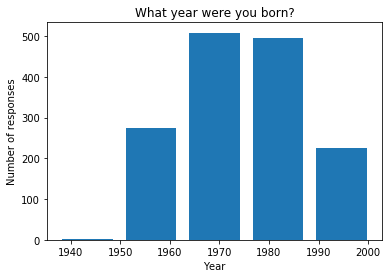

In [26]:
import matplotlib.pyplot as plt

plt.hist(df[YEAR_BORN], bins = 5, rwidth=0.8)
plt.ylabel('Number of responses')
plt.xlabel('Year')
plt.title('What year were you born?')
plt.show()

Try changing the number of bins and observe how the plot changes. The higher the number of bins, the smaller the bars will become, as it will divide the data in more segments. If you know the _min_ and _max_ of your data values, you can calculate an appropiate number of bins depending of what you want to observe. For example, if your data values go from 1 to 100, if you select 10 bins, it will divide your data in segments of every 10: 1-10, 11-20, ... , 91-100. If you select 5 bins, it will divide your data in segments of every 5: 1-5, 6-10, ... , 96-100. Always choose a number of bins that allows you to observe the tendency of the data.

Now, let's make a histogram with some nominal data. To do this, we first need to obtain the frequency distribution for the data we want to plot (See Exercise 2), and then use a bar plot to visualise the distribution. In this case, we don't need to use the histogram function, and there's no bin size because we're not dealing with numerical data.

Let's make the bar plot for the question _Which of the following best describes your industry?_ Given that our data has nominal data, it's best to make a horizontal bar plot. Additionally, we can use the pandas function `plot.barh()` to plot the data. This way, we only need to obtain the frequency distribution of the data and then plot. We can set the title of the plot as an option and then we can specify the labels of the axis using the `set_xlabel()` and `set_ylabel` functions.

Text(0, 0.5, 'Industry')

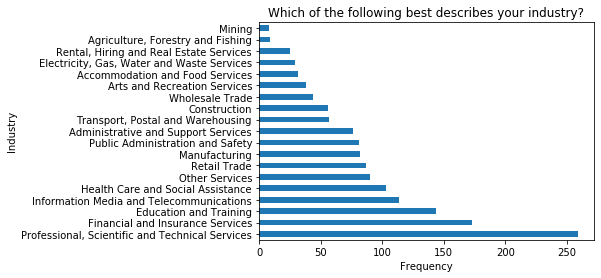

In [27]:
industry_freq = df[INDUSTRY].value_counts()
ax = industry_freq.plot.barh(title='Which of the following best describes your industry?')
ax.set_xlabel('Frequency')
ax.set_ylabel('Industry')

### TODO: Make a histogram for the question: _Which of the following best describes your current occupation?_

Text(0, 0.5, 'Occupation')

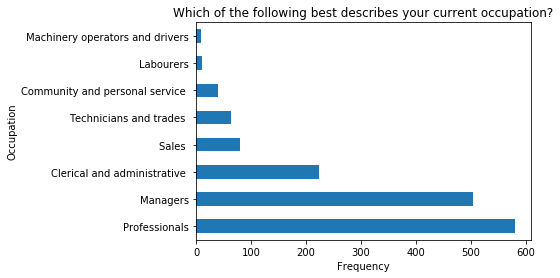

In [28]:
# TODO: replace the content of this cell with your Python solution
occupation_freq = df[OCCUPATION].value_counts()
ax = occupation_freq.plot.barh(title = 'Which of the following best describes your current occupation?')
ax.set_xlabel('Frequency')
ax.set_ylabel('Occupation')

### Making a scatterplot

Finally, let's make a scatterplot to compare the year born with the percentage of time WFH.

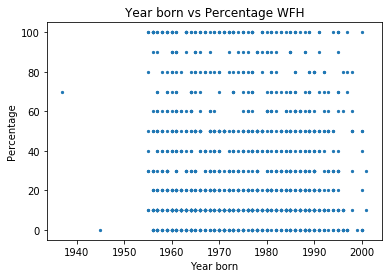

In [29]:
data = df[[YEAR_BORN,PERCENTAGE_WFH_LAST_YEAR]]
data[PERCENTAGE_WFH_LAST_YEAR] = data[PERCENTAGE_WFH_LAST_YEAR].str.rstrip('%').astype('float')
data_sorted = data.sort_values(by=YEAR_BORN)

plt.scatter(data_sorted[YEAR_BORN], data_sorted[PERCENTAGE_WFH_LAST_YEAR], s=5)
plt.title('Year born vs Percentage WFH')
plt.xlabel('Year born')
plt.ylabel('Percentage')
plt.show()

## BONUS: Exploring other plotting options and customisation

If you would like to explore more plotting options, we recommend you visit the `seaborn` tutorial here https://seaborn.pydata.org/tutorial.html

You will find multiple plotting options and will learn how to edit your plot to your liking. Here, we show you some examples of what you can achieve by using the `seaborn` library.

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1");

AttributeError: module 'seaborn' has no attribute 'set_theme'

 ## EXERCISE 5: Boxplot and Correlation

### Draw a boxplot for year born

Mean and standard deviation are not informative for skewed data. `boxplot` is is a good visualisation for viewing and comparing distributions. It also shows outliers, e.g., values greater than `Q3+1.5*IQR` or less than `Q1-1.5*IQR`.

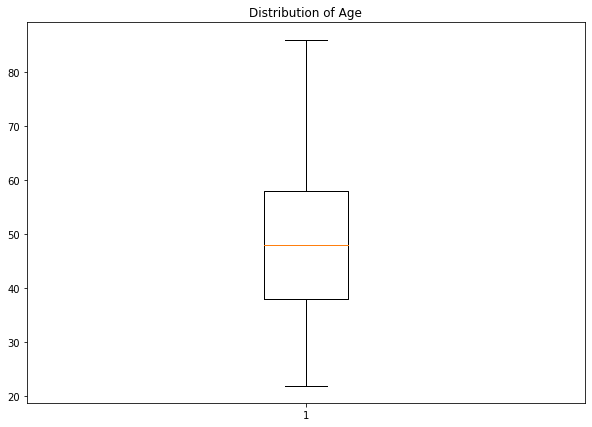

In [31]:
from datetime import datetime, date


data = df[YEAR_BORN].dropna().to_list()

def birthdate_to_age(born):
    #get today's date
    today = date.today()
    return int(today.year - born.year - ((today.month,
                                          today.day) < (born.month,
                                                        born.day)))

age_list = [birthdate_to_age(b) for b in data]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(age_list)
plt.title('Distribution of Age')
plt.show()

### Calculate correlation between two variables

Scipy includes various correlation statistics​

- Pearson’s r for two normally distributed variables​: stats.pearsonr()

- Spearman’s rho for ratio data, ordinal data, etc (rank-order correlation): stats.spearmanr()

In [32]:
from scipy import stats

# only keep rows where both year born and percentage wfh last year are defined
data = df[[YEAR_BORN,PERCENTAGE_WFH_LAST_YEAR]].dropna()

year_born = data[YEAR_BORN]
precent_wfh = data[PERCENTAGE_WFH_LAST_YEAR]

print(stats.spearmanr(year_born, precent_wfh)) 

SpearmanrResult(correlation=0.03514984077998032, pvalue=0.17291319443568165)


# End of Exercise. Many Thanks.